In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn import manifold, preprocessing
from sklearn.cluster import KMeans
import warnings

random_state = 2023

# Remove ancient duplicated relationships 

Relationships from the same modern society correspond differently in ancient societies.  
(√) marked as the final retained relationship.

- 人 - 上帝
    - 天人之间
    - 人神之间（√）
- 师父-徒弟   
    - 宗教中的师徒之间  
    - 师傅和学徒（√）
- 公公婆婆-媳妇 
    - 公公和儿媳
    - 婆婆和儿媳（√）
- 雇主-雇员
    - 地主和佃农
    - 店主和伙计（√）
- 外地人-本地人
    - 本地人和异乡人
    - 土籍人士和客籍人士（√）
- 教徒之间
    - 佛教徒之间（√）
    - 道教徒之间
- 未婚夫-未婚妻
    - 门当户对的订婚男女之间（√）
    - 私奔男女之间
- 校友之间
    - 同场次中科举者之间
    - 同门师兄弟之间（√）
    - 同校学生之间
- 原配-第三者
    - 妻妾之间
    - 妻子和外妇（非妾）之间（√）

In [7]:
ancient_modern_map = pd.read_excel('../Across_history/1.GPT4_DESC/CHN_ancient/chn_ancient_results_final.xlsx')
questionnaire = pd.read_excel('pre_file/questionnaire.xlsx')

ancient_modern_map['问卷呈现'] = questionnaire['古代人际关系130']
ancient_modern_map.head(3)

,古代人际关系名称_现汉,对应的现代人际关系,古代人際關係名稱_文言,description,query,问卷呈现
0,暧昧对象之间,暧昧对象之间,曖昧者之間,男女曖昧之事，悖於人倫，是以隱於心而不擅發於外。其或發於外者，亦以含蓄之言，傳微妙之情，假落...,曖昧者之間,暧昧对象之间
1,暗恋对象和暗恋者,暗恋对象-暗恋者,暗戀者與被暗戀者,暗戀者，古語或謂單相思。男女之間，礙于父母之命，媒妁之言，婚姻之有定也，於是己固思慕彼而不敢...,暗戀者與被暗戀者之間,暗恋对象-暗恋者
2,报案人和受害者,报案人-受害者,報案者與受害者,報案者之于受害者也，或同系一人，或其鄰裡親朋之知情者也。自秦法以降，遞有閭閻連坐之策，凡知情...,報案者與受害者之間,报案人-受害者


In [15]:
duplicated_exclude_rels = [
                '天人之间','宗教中的师徒之间','公公和儿媳','地主和佃农','本地人和异乡人',
                '道教徒之间','私奔男女之间','同场次中科举者之间','同校学生之间','妻妾之间']

ancient_120r_rels = ancient_modern_map.loc[~ancient_modern_map['古代人际关系名称_现汉'].isin(duplicated_exclude_rels),
                            ['问卷呈现','对应的现代人际关系','古代人際關係名稱_文言','query']]
ancient_120r_rels.to_csv('output_data/ancient_modern_map_120r.csv',encoding='gb18030')

In [10]:
expert_data = pd.read_csv('output_data/clean_results/dim_rel_df.csv',index_col=0, encoding = 'gb18030')
expert_data_120r = expert_data.loc[ancient_120r_rels['问卷呈现'],]
expert_data_120r_scaled = pd.DataFrame(preprocessing.scale(expert_data_120r),
                index = expert_data_120r.index,columns = expert_data_120r.columns)
expert_data_120r.to_csv('output_data/clean_results/expert_dim_rel_120r.csv',encoding='gb18030')
expert_data_120r_scaled.to_csv('output_data/clean_results/expert_dim_rel_120r_scaled.csv',encoding='gb18030')

# HPP model

In [17]:
data = expert_data_120r_scaled
model = KMeans(3, random_state=random_state)
model.fit(data)
cluster_labels = model.fit_predict(data)

human_scaled_hpp = data
human_scaled_hpp['k3'] = cluster_labels
human_scaled_hpp.to_csv('output_data/favee_hpp_results/expert_120r_hpp.csv',
                        encoding= ' gb18030')

In [18]:
raw_results = human_scaled_hpp
for n in range(len(raw_results['k3'].unique())):
    each_cluster = raw_results.index[raw_results['k3']==n]
    print("\nCluster "+str(n+1)+" Relationship:{}".format(len(each_cluster)))
    print(*raw_results.index[raw_results['k3']==n], sep = ", ")


Cluster 1 Relationship:46
暧昧对象之间, 暗恋对象-暗恋者, 文选(诗集)的编者-作者, 表兄弟姐妹之间, 施恩者-受恩者, 青梅竹马之间, 人神之间, 叔侄, 双胞胎之间, 堂兄弟姐妹之间, 同父异母(或同母异父)的子女之间, 继子女之间, 同窗之间, 夫妻之间, 父母-子女, 义父母-义子女, 婆婆-儿媳, 继父母-子女, 继祖父母-继孙, 养父母-子女, 师生之间, 佛教徒之间, 发小之间, 外公外婆-外孙/外孙女, 门当户对的订婚男女之间, 同门师兄弟之间, 同父同母的子女之间, 祖孙之间, 姨父姨妈-侄子侄女, 行侠仗义之人-受助者, 同乡之间, 邻里之间, 狐朋狗友之间, 普通朋友之间, 故旧朋友之间, 挚友之间, 知己之间, 丈夫-外妇, 远亲之间, 岳父岳母-女婿, 同袍（战友）之间, 同盟朋党之间, 奶妈-小孩, 祖先-后代, 远房表兄弟姐妹之间, 亲家之间

Cluster 2 Relationship:47
厨子-食客, 店主-顾客, 官场的上下级之间, 生意合伙人之间, 师傅-学徒, 掌柜-客人, 同僚之间, 房东-租户, 伙计-顾客, 主人-家丁, 店主-伙计, 官员-行贿者, 状元-榜眼-探花, 绿林好汉的头领-属下(喽啰), 家庭私塾教师-学生, 土籍人士-客籍人士, 学府书院的负责人与教师之间, 戏班-剧作者, 戏子-观众, 音乐曲艺人-听众, 大夫-病人, 嫖客-妓女, 掌柜-店主, 掌柜-伙计, 捐助者-受惠者, 将领-士兵, 考官-考生, 老师-家长, 旅途同行人之间, 卖家-买家, 前任官员-现任官员, 官民之间, 掮客-客户, 主人-客人, 主人-奴婢, 奶妈-家长, 正职-副职, 教首(教主)-教徒, 保长(坊长)-居民, 君臣之间, 讼师(状师)-司法人员, 讼师(状师)-委托人, 捕快-百姓, 司法人员-监察人员, 犯罪同伙之间, 作家-读者, 作家-评论家

Cluster 3 Relationship:27
报案人-受害者, 报案人-罪犯, 敌人之间, 情敌之间, 泛泛之交之间, 生意竞争对手之间, 首领-反贼, 政治谈判中对立的双方, 搭讪的人-被搭讪的人, 刑案中的施害者-受害者, 刑案中的受害者-旁观（目击）者, 小人之交, 路人之间, 乞丐-路人, 牢头-囚犯, 原告-被告, 妻

In [19]:
def cluster_rdm(cluster_results,cluster_model='k3'):
    dissim_cluster_result = pd.DataFrame(index = cluster_results.index,
                                         columns = cluster_results.index)
    for i in dissim_cluster_result.index:
        for j in dissim_cluster_result.columns:
            # cluster result was in the last column
            if cluster_results.loc[i,cluster_model] == cluster_results.loc[j,cluster_model]:
                dissim_cluster_result.loc[i,j] = 0
            else:
                dissim_cluster_result.loc[i,j] = 1
            dissim_cluster_result = dissim_cluster_result.astype(float)
            
    return(dissim_cluster_result)

In [20]:
hpp_sim = -cluster_rdm(human_scaled_hpp,'k3')
hpp_sim.to_csv('output_data/favee_hpp_results/human_expert_120r_hpp.csv',encoding='gb18030')

# FAVEE model

In [35]:
library(lsa) #cosine
library(mgsub)
library(openxlsx)

library(tidyverse)
library(patchwork) #setNames


library(gghalves)
library(reshape2)

library(RColorBrewer)
library(boot)
library(corrplot)

FAVEE = c('Formality','Activeness','Valence','Exchange','Equality')

In [34]:
expert_120r = read.csv('output_data/clean_results/expert_dim_rel_120r_scaled.csv',row.names=1,check.names=FALSE)
expert_120r = expert_120r[, !names(expert_120r) %in% c("Male Evaluation", "Female Evaluation")]
dim(expert_120r)

question_mapping <- setNames(ancient_120r_map$'对应的现代人际关系',ancient_120r_map$'问卷呈现')
rownames(expert_120r) <- question_mapping[rownames(expert_120r)]
rels_order_120r = rownames(expert_120r)

expert_120r_raw = read.csv('output_data/clean_results/expert_dim_rel_120r.csv',row.names=1,check.names=FALSE)
expert_120r_raw = expert_120r_raw[, !names(expert_120r_raw) %in% c("Male Evaluation", "Female Evaluation")]
rownames(expert_120r_raw) <- question_mapping[rownames(expert_120r_raw)]
dim(expert_120r_raw)

write.csv(expert_120r,'output_data/clean_results/expert_dim_rel_120r_scaled_chi.csv')
write.csv(expert_120r_raw,'output_data/clean_results/expert_dim_rel_120r_chi.csv')

# caculate cosine similarity
expert_120r_sim = cosine_matrix(expert_120r)
write.csv(expert_120r_sim, 'output_data/sim_matrix/expert_120r_sim_cosine.csv')
expert_120r_sim_array = lowerTriangle(expert_120r_sim)

[1] 120  33

[1] 120  33

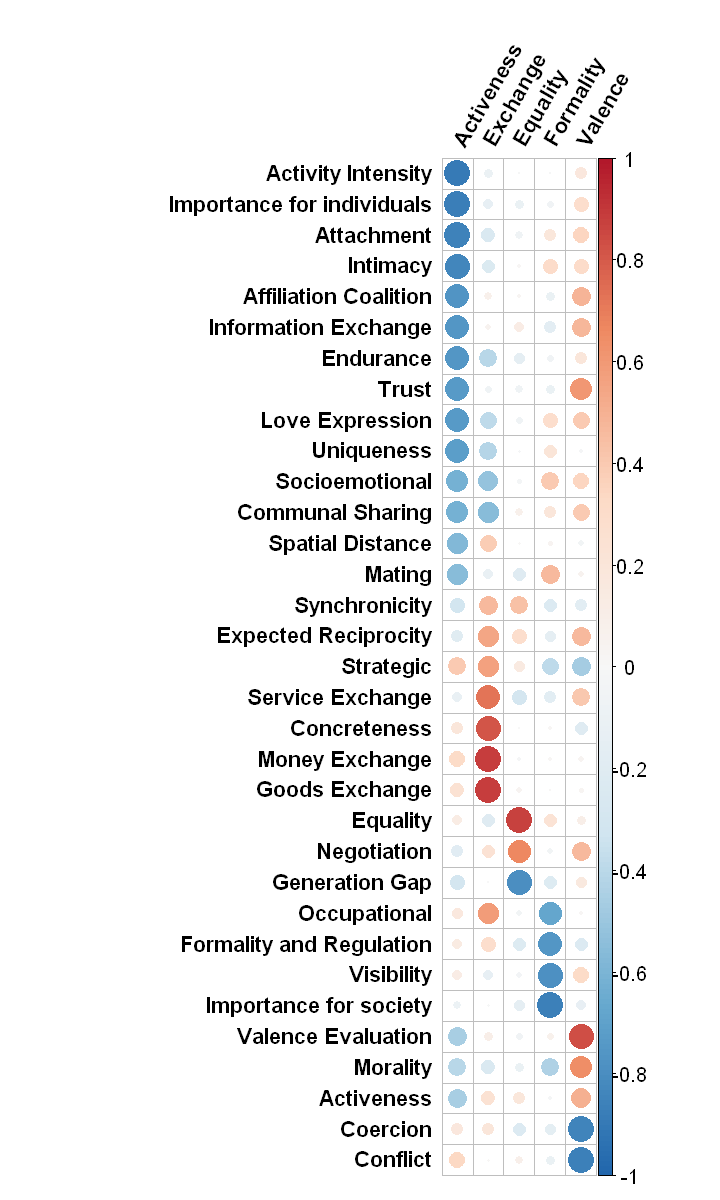

In [36]:
dim_rel.pca = prcomp(expert_120r)
ncomp = 5

loadings_none = dim_rel.pca$rotation[,1:ncomp]%*% diag(dim_rel.pca$sdev,ncomp,ncomp)
scores_none = dim_rel.pca$x[,1:ncomp] 

loadings_var = varimax(loadings_none)$loadings
scores_var = scale(scores_none) %*% varimax(loadings_none)$rotmat

loadings_var_reorder = as.data.frame(loadings_var[,1:ncomp])

#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:33)){
    temp_max = abs(loadings_var_reorder[row,1])
    n = 1
    for (col in c(2:5)){
        temp = abs(loadings_var_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
        }
        
    }
    order_list[row] = n
}
loadings_var_reorder = loadings_var_reorder %>% mutate(order = order_list)

RC1 = loadings_var_reorder %>% filter(order==1) %>% arrange(V1)
RC2 = loadings_var_reorder %>% filter(order==2) %>% arrange(V2)
RC3 = loadings_var_reorder %>% filter(order==3) %>% arrange(desc(V3))
RC4 = loadings_var_reorder %>% filter(order==4) %>% arrange(desc(V4))
RC5 = loadings_var_reorder %>% filter(order==5) %>% arrange(desc(V5))



loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
loadings_var_reorder = loadings_var_reorder[1:5]

colnames(loadings_var_reorder) = c('Activeness','Exchange','Equality','Formality','Valence')
options(repr.plot.width=6, repr.plot.height=10)
my.breaks = c(seq(-1,1,by=0.01))
corrplot(as.matrix(loadings_var_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(-1,1),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))

expert_120r_scores = data.frame(scores_var)
colnames(expert_120r_scores) = colnames(loadings_var_reorder)
write.csv(expert_120r_scores, 'output_data/favee_hpp_results/expert_120r_scores.csv')

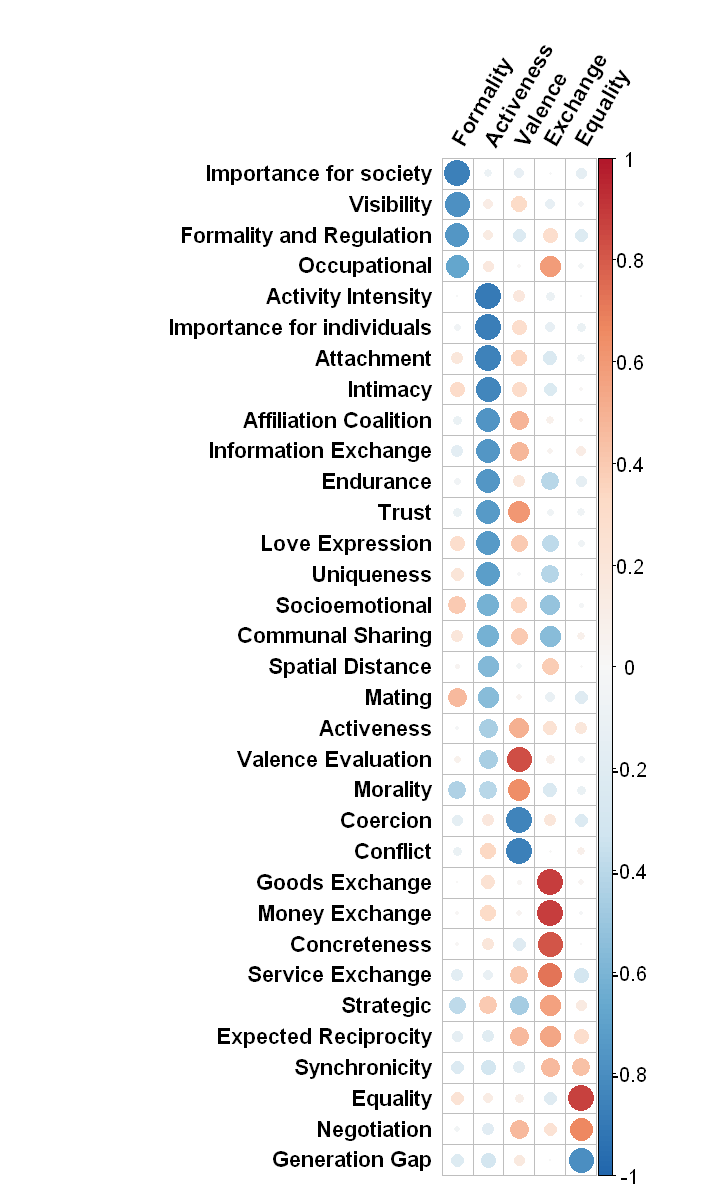

In [37]:
dim_rel.pca = prcomp(expert_120r)
ncomp = 5

loadings_none = dim_rel.pca$rotation[,1:ncomp]%*% diag(dim_rel.pca$sdev,ncomp,ncomp)
scores_none = dim_rel.pca$x[,1:ncomp] 

loadings_var = varimax(loadings_none)$loadings
scores_var = scale(scores_none) %*% varimax(loadings_none)$rotmat

loadings_var_reorder = as.data.frame(loadings_var[,1:ncomp])

#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:33)){
    temp_max = abs(loadings_var_reorder[row,1])
    n = 1
    for (col in c(2:5)){
        temp = abs(loadings_var_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
        }
        
    }
    order_list[row] = n
}
loadings_var_reorder = loadings_var_reorder %>% mutate(temp_order = order_list)
loadings_var_reorder['Activeness','temp_order'] = 1
loadings_var_reorder = loadings_var_reorder %>% mutate(order = 
                                    case_when(temp_order==1~2,temp_order==2~4,
                                              temp_order==3~5,temp_order==4~1,
                                              temp_order==5~3))

RC1 = loadings_var_reorder %>% filter(order==1) %>% arrange(V4)
RC2 = loadings_var_reorder %>% filter(order==2) %>% arrange(V1)
RC3 = loadings_var_reorder %>% filter(order==3) %>% arrange(desc(V5))
RC4 = loadings_var_reorder %>% filter(order==4) %>% arrange(desc(V2))
RC5 = loadings_var_reorder %>% filter(order==5) %>% arrange(desc(V3))



loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
loadings_var_reorder = loadings_var_reorder[1:5]

colnames(loadings_var_reorder) = c('Activeness','Exchange','Equality','Formality','Valence')
loadings_var_reorder = loadings_var_reorder[,FAVEE]
options(repr.plot.width=6, repr.plot.height=10)
my.breaks = c(seq(-1,1,by=0.01))
corrplot(as.matrix(loadings_var_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(-1,1),cl.ratio = 0.4,cl.cex=1,
         col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))

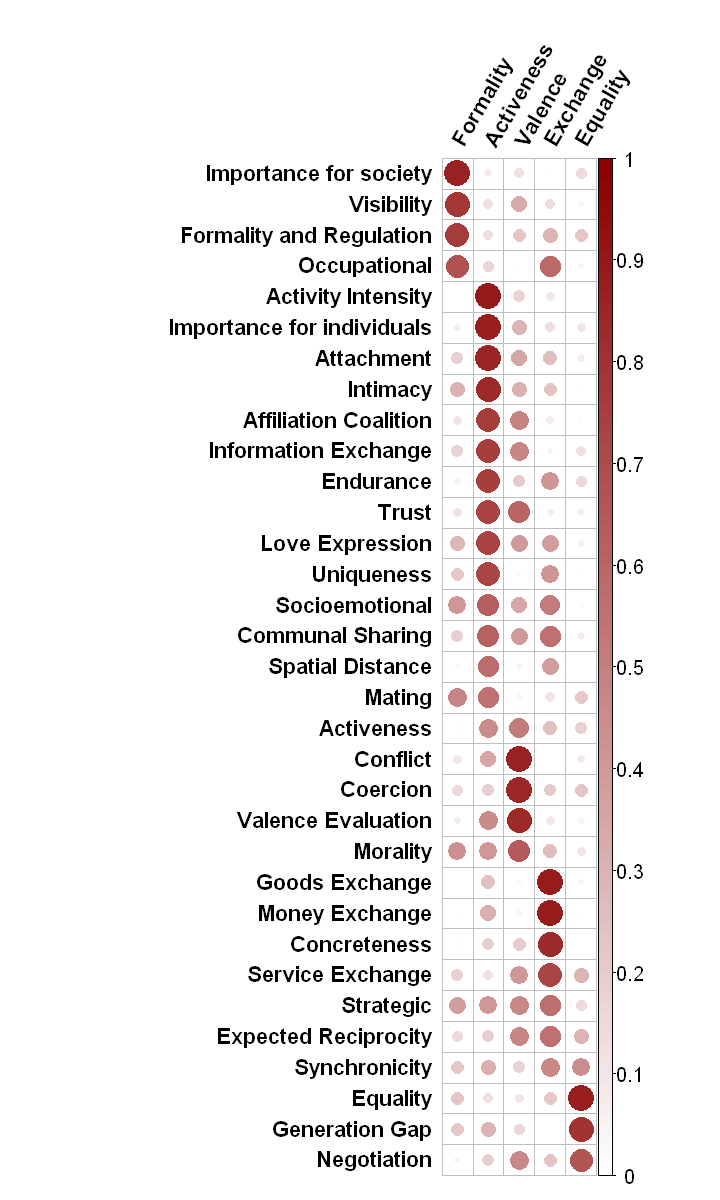

In [38]:
dim_rel.pca = prcomp(expert_120r)
ncomp = 5

loadings_none = dim_rel.pca$rotation[,1:ncomp]%*% diag(dim_rel.pca$sdev,ncomp,ncomp)
scores_none = dim_rel.pca$x[,1:ncomp] 

loadings_var = varimax(loadings_none)$loadings
scores_var = scale(scores_none) %*% varimax(loadings_none)$rotmat

loadings_var_reorder = as.data.frame(loadings_var[,1:ncomp])

#filter each row's max loading, and attribute it to correspnding column.
order_list = c()
for (row in c(1:33)){
    temp_max = abs(loadings_var_reorder[row,1])
    n = 1
    for (col in c(2:5)){
        temp = abs(loadings_var_reorder[row,col])
        if (temp > temp_max){
            temp_max = temp
            n = col
        }
        
    }
    order_list[row] = n
}
loadings_var_reorder = abs(loadings_var_reorder) %>% mutate(temp_order = order_list)
loadings_var_reorder['Activeness','temp_order'] = 1
loadings_var_reorder = loadings_var_reorder %>% mutate(order = 
                                    case_when(temp_order==1~2,temp_order==2~4,
                                              temp_order==3~5,temp_order==4~1,
                                              temp_order==5~3))

RC1 = loadings_var_reorder %>% filter(order==1) %>% arrange(desc(V4))
RC2 = loadings_var_reorder %>% filter(order==2) %>% arrange(desc(V1))
RC3 = loadings_var_reorder %>% filter(order==3) %>% arrange(desc(V5))
RC4 = loadings_var_reorder %>% filter(order==4) %>% arrange(desc(V2))
RC5 = loadings_var_reorder %>% filter(order==5) %>% arrange(desc(V3))



loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
loadings_var_reorder = loadings_var_reorder[1:5]

colnames(loadings_var_reorder) = c('Activeness','Exchange','Equality','Formality','Valence')
loadings_var_reorder = loadings_var_reorder[,FAVEE]

options(repr.plot.width=6, repr.plot.height=10)
my.breaks = c(seq(0,1,by=0.01))
corrplot(as.matrix(loadings_var_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(0,1),cl.ratio = 0.4,cl.cex=1,
         col= colorRampPalette(c("white","darkred"))(100))

In [39]:
png("../Across_history/3.Human_compare&Model_compare/output_graph/expert_pca_loadings.png", bg="transparent",
    family = 'sans',units='in',width=6,height=10,res=300)
options(repr.plot.width=6, repr.plot.height=10)
my.breaks = c(seq(0,1,by=0.01))
corrplot(as.matrix(loadings_var_reorder),is.corr=FALSE,
         tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
         col.lim = c(0,1),cl.ratio = 0.4,cl.cex=1,
         col= colorRampPalette(c("white","darkred"))(100))
dev.off()

png 
  2

,Formality.modern,Activeness.modern,Valence.modern,Exchange.modern,Equality.modern
Formality,-0.81,-0.06,0.16,-0.14,0.16
Activeness,0.04,-0.86,-0.03,0.11,0.05
Valence,0.09,-0.02,0.82,0.05,0.09
Exchange,0.16,0.12,-0.21,0.78,-0.04
Equality,0.10,0.13,-0.09,0.00,0.88


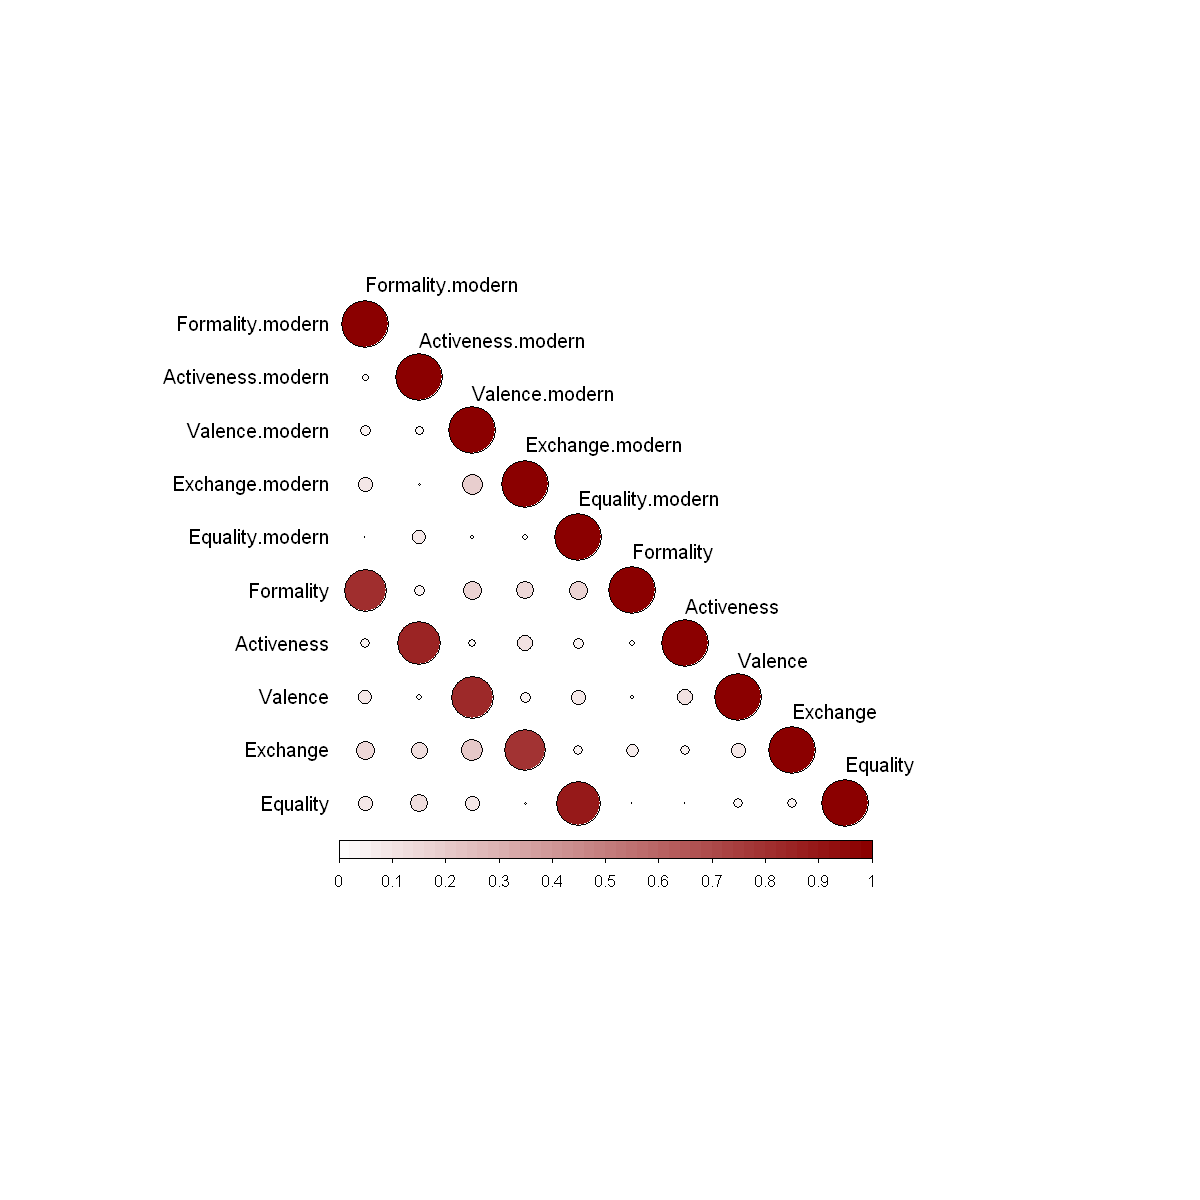

In [44]:
human_score = read.csv('../Across_history/3.Human_compare&Model_compare/human_rating_data/human_model/CHN_258r_favee.csv',row.names=1)
colnames(human_score) = gsub('human','modern',colnames(human_score))
human_score = human_score[rownames(expert_120r_scores),paste0(FAVEE,'.modern')]

scores_var_out = expert_120r_scores[,FAVEE]
score_combine = cbind(human_score,scores_var_out)
score.cor = cor(score_combine, method='spearman')
round(score.cor[6:10,1:5],2)
      
options(repr.plot.width=10,repr.plot.height=10)
corrplot(abs(as.matrix(score.cor)),
         type = 'lower',diag = TRUE,bg='transparent',
         col.lim = c(0,1),col= colorRampPalette(c("midnightblue","white","darkred"))(100),
         tl.col="black",tl.srt = 0.001, mar = c(2,2,2,2),
         family = 'sans',outline=TRUE,addgrid.col="white")

# Spearman correlation

In [3]:
cosine_matrix = function(raw_data){
    # rel*rel matrix caculated by cosine similarity
    n <- nrow(raw_data)  # raw_data is an n x n matrix, 159*dimensions
    # create an empty matrix to store cosine similarity
    raw_data_cor <- matrix(0, nrow = n, ncol = n)
    colnames(raw_data_cor) <- rownames(raw_data)
    rownames(raw_data_cor) <- rownames(raw_data)
    # calculate the cosine similarity of the upper triangular part
    for (i in 1:(n - 1)) {
        for (j in (i + 1):n) {
            cosine_value <- cosine(as.numeric(raw_data[i, ]), as.numeric(raw_data[j, ]))
            raw_data_cor[i, j] <- cosine_value
        }
    }
    # symmetrically fill the cosine similarity in the lower triangular part
    raw_data_cor <- raw_data_cor + t(raw_data_cor)

    # set the diagonal to 1
    diag(raw_data_cor) <- 1
    return(raw_data_cor)
}

lowerTriangle <- function(m){
  return(m[lower.tri(m,diag = FALSE)])
}

In [5]:
ancient_120r_map = read.csv('output_data/ancient_modern_map_120r.csv',row.names=1)
head(ancient_120r_map,3)

,问卷呈现,对应的现代人际关系,古代人際關係名稱_文言,query
,<chr>,<chr>,<chr>,<chr>
0,暧昧对象之间,暧昧对象之间,曖昧者之間,曖昧者之間
1,暗恋对象-暗恋者,暗恋对象-暗恋者,暗戀者與被暗戀者,暗戀者與被暗戀者之間
2,报案人-受害者,报案人-受害者,報案者與受害者,報案者與受害者之間


## Import data

### Ancient Chinese BERT

In [19]:
bert_120r_sim = read.csv('../Across_history/3.Human_compare&Model_compare/sim_bert_embedding/ancient/q3.2_bert_embedding_data/MASK_embedding_output.csv',row.names =1,check.names=FALSE)
bert_120r_sim = bert_120r_sim[rels_order_120r,rels_order_120r]
bert_120r_sim_array = lowerTriangle(bert_120r_sim)

### Modern Chinese

In [20]:
human_120r_sim = read.csv('../Across_history/3.Human_compare&Model_compare/human_rating_data/human_model/human_33d_120r_cosine.csv',row.names =1,check.names=FALSE)
human_120r_sim = human_120r_sim[rels_order_120r,rels_order_120r]
human_120r_sim_array = lowerTriangle(human_120r_sim)

### Modern Americans

In [23]:
usa_159r_sim = read.csv('pre_file/usa_human_33d_159r_cosine.csv',row.names=1,check.names=FALSE)
usa_chn_rels_map = read.xlsx('pre_file/2_Total_Relation_6.xlsx',sheet = 'Sheet1')
rels_258_usa = read.csv('pre_file/rels_simple.csv',row.names=1)
name_mapping <- setNames(usa_chn_rels_map$'Relationships', # new name
                        rownames(rels_258_usa)) # old name
usa_159r_sim$'rel' = name_mapping[rownames(usa_159r_sim)]

rownames(usa_159r_sim) = usa_159r_sim$'rel'
usa_159r_sim = usa_159r_sim[,-which(names(usa_159r_sim) == "rel")]
colnames(usa_159r_sim) = rownames(usa_159r_sim)

inter_rels_72r = intersect(rels_order_120r,rownames(usa_159r_sim))
length(inter_rels_72r)
usa_72r_sim = usa_159r_sim[inter_rels_72r,inter_rels_72r]
usa_72r_sim_array = lowerTriangle(usa_72r_sim)

expert_72r_sim_array = lowerTriangle(expert_120r_sim[inter_rels_72r,inter_rels_72r])
human_72r_sim_array = lowerTriangle(human_120r_sim[inter_rels_72r,inter_rels_72r])
bert_72r_sim_array = lowerTriangle(bert_120r_sim[inter_rels_72r,inter_rels_72r])

inter_rels_72r_df = data.frame(inter_rels_72r)
write.csv(inter_rels_72r_df,'pre_file/inter_rels_72r_df.csv')

[1] 72

## 120 relationships

In [24]:
data_combine = cbind(human_120r_sim_array,expert_120r_sim_array,bert_120r_sim_array)
data_combine.cor = cor(data_combine, method = 'spearman')
data_combine.cor

,human_120r_sim_array,expert_120r_sim_array,bert_120r_sim_array
human_120r_sim_array,1.0000000,0.7979778,0.4310078
expert_120r_sim_array,0.7979778,1.0000000,0.4891754
bert_120r_sim_array,0.4310078,0.4891754,1.0000000


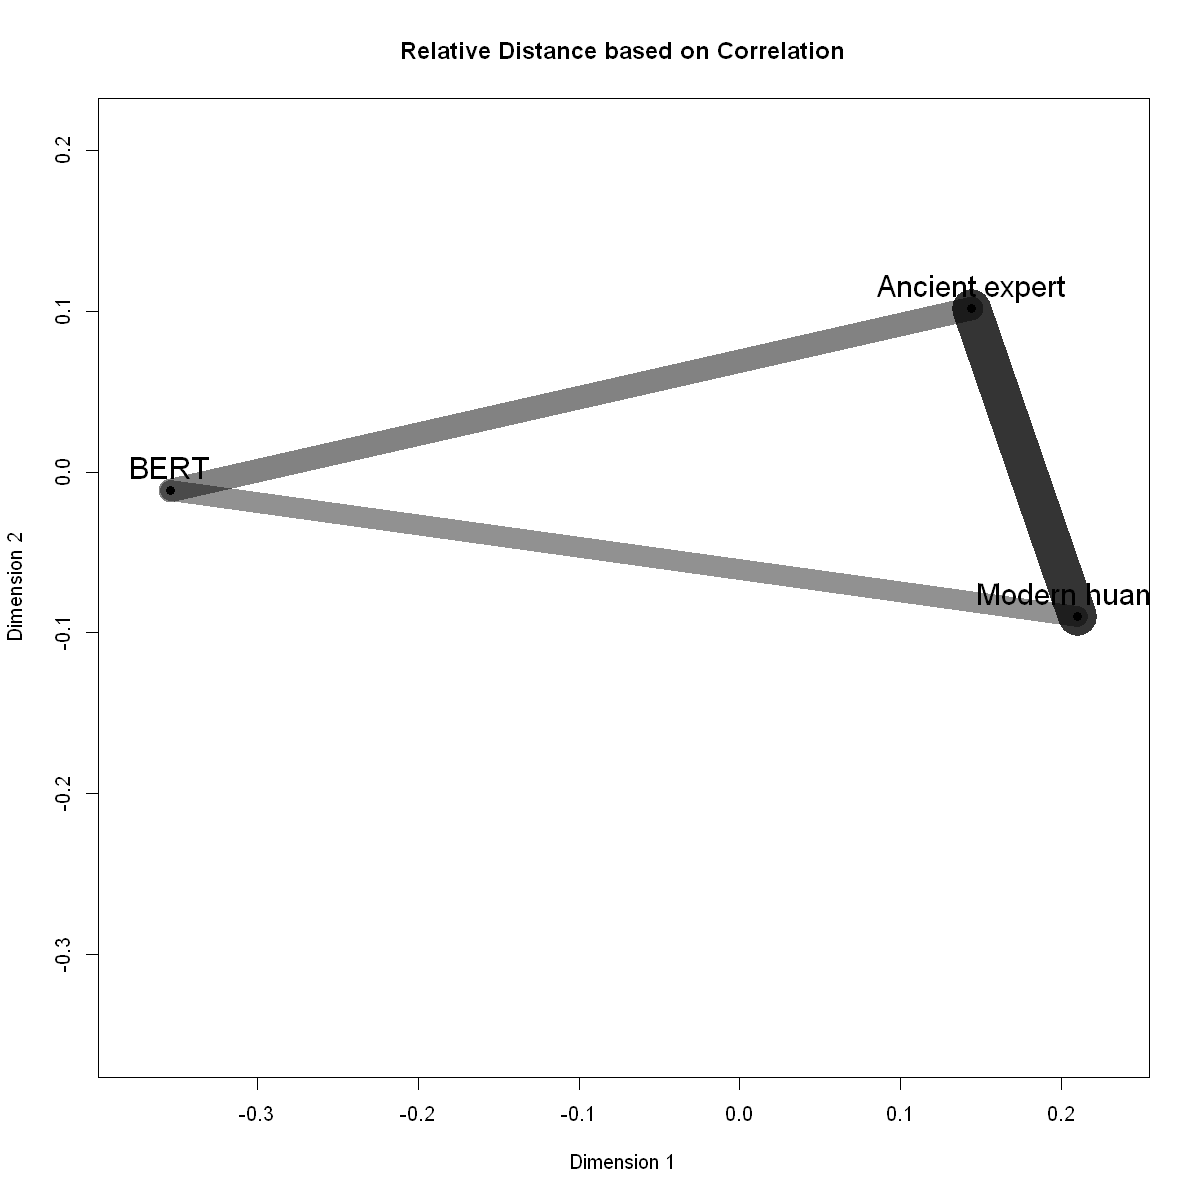

In [25]:
dist_matrix = 1-data_combine.cor
coords <- cmdscale(dist_matrix, eig = TRUE, k = 2)$points

options(repr.plot.width=10,repr.plot.height=10)
plot(coords, pch=19, xlim=c(min(coords), max(coords)), ylim=c(min(coords), max(coords)), 
     xlab="Dimension 1", ylab="Dimension 2", main="Relative Distance based on Correlation", asp = 1)
text(coords, labels=c("Modern huamn", "Ancient expert", "BERT"), pos=3,cex=1.5)


for(i in 1:(nrow(coords)-1)) {
  for(j in (i+1):nrow(coords)) {
    col_line <- rgb(0, 0, 0, alpha=data_combine.cor[i,j])
    lines(rbind(coords[i,], coords[j,]), lwd=40*data_combine.cor[i,j], col=col_line)
  }
}

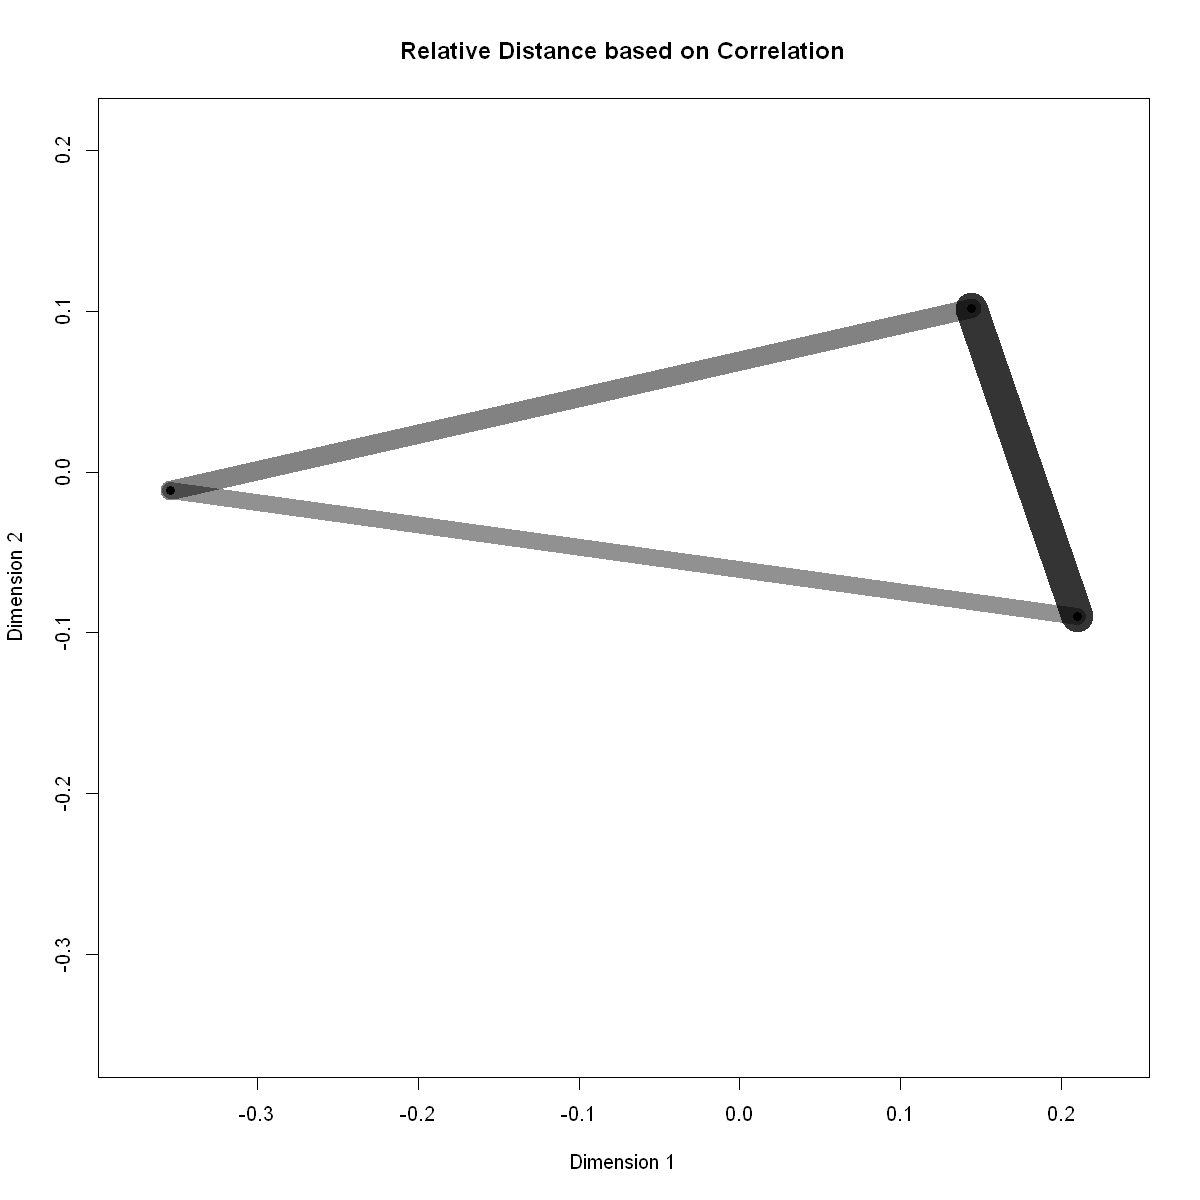

In [26]:
options(repr.plot.width=10,repr.plot.height=10)
plot(coords, pch=19, xlim=c(min(coords), max(coords)), ylim=c(min(coords), max(coords)), 
     xlab="Dimension 1", ylab="Dimension 2", main="Relative Distance based on Correlation", asp = 1)
text(coords, labels=c("", "", ""), pos=3,cex=1.5)


for(i in 1:(nrow(coords)-1)) {
  for(j in (i+1):nrow(coords)) {
    col_line <- rgb(0, 0, 0, alpha=data_combine.cor[i,j])
    lines(rbind(coords[i,], coords[j,]), lwd=33*data_combine.cor[i,j], col=col_line)
  }
}

## 72 relationships

In [27]:
data_combine = cbind(expert_72r_sim_array,human_72r_sim_array,usa_72r_sim_array,bert_72r_sim_array)
data_combine.cor = cor(data_combine, method = 'spearman')
data_combine.cor

,expert_72r_sim_array,human_72r_sim_array,usa_72r_sim_array,bert_72r_sim_array
expert_72r_sim_array,1.0000000,0.7996672,0.7235787,0.5058889
human_72r_sim_array,0.7996672,1.0000000,0.7892876,0.4355365
usa_72r_sim_array,0.7235787,0.7892876,1.0000000,0.3855431
bert_72r_sim_array,0.5058889,0.4355365,0.3855431,1.0000000


In [30]:
expert_72r_sim = expert_120r_sim[inter_rels_72r,inter_rels_72r]
human_72r_sim = human_120r_sim[inter_rels_72r,inter_rels_72r]
bert_72r_sim = bert_120r_sim[inter_rels_72r,inter_rels_72r]

write.csv(expert_72r_sim,'output_data/sim_matrix/expert_72r_sim_cosine.csv')
write.csv(human_72r_sim,'output_data/sim_matrix/human_72r_sim_cosine.csv')
write.csv(bert_72r_sim,'output_data/sim_matrix/bert_72r_sim_cosine.csv')
write.csv(usa_72r_sim,'output_data/sim_matrix/usa_72r_sim_cosine.csv')

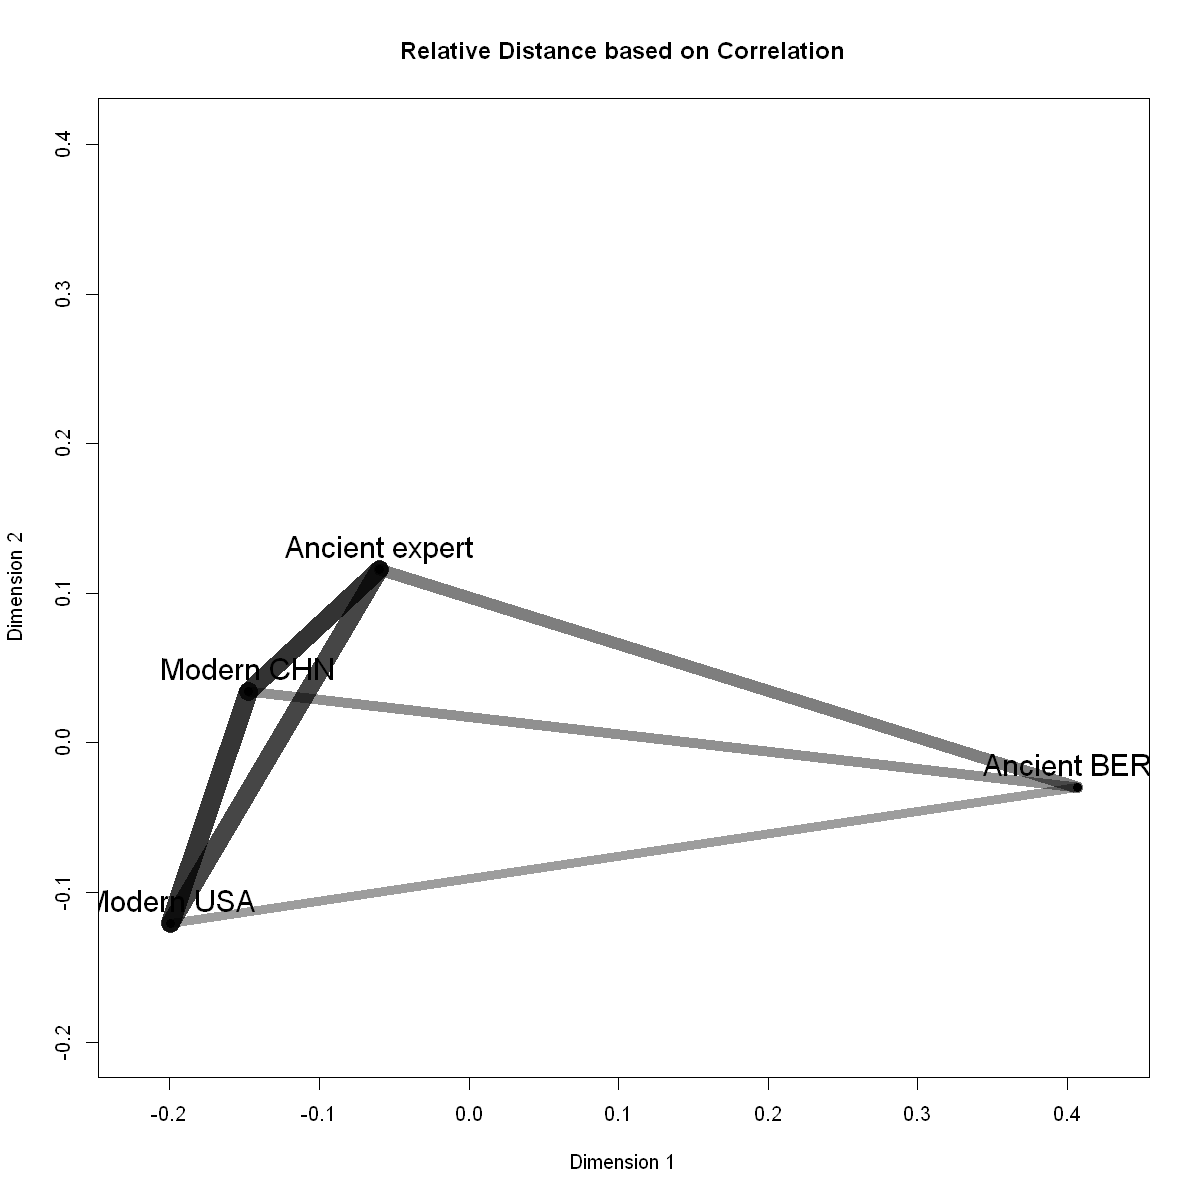

In [31]:
dist_matrix = 1-data_combine.cor
coords <- cmdscale(dist_matrix, eig = TRUE, k = 2)$points

options(repr.plot.width=10,repr.plot.height=10)
plot(coords, pch=19, xlim=c(min(coords), max(coords)), ylim=c(min(coords), max(coords)), 
     xlab="Dimension 1", ylab="Dimension 2", main="Relative Distance based on Correlation", asp = 1)
text(coords, labels=c("Ancient expert","Modern CHN", "Modern USA" ,"Ancient BERT"), pos=3,cex=1.5)


for(i in 1:(nrow(coords)-1)) {
  for(j in (i+1):nrow(coords)) {
    col_line <- rgb(0, 0, 0, alpha=data_combine.cor[i,j])
    lines(rbind(coords[i,], coords[j,]), lwd=20*data_combine.cor[i,j], col=col_line)
  }
}

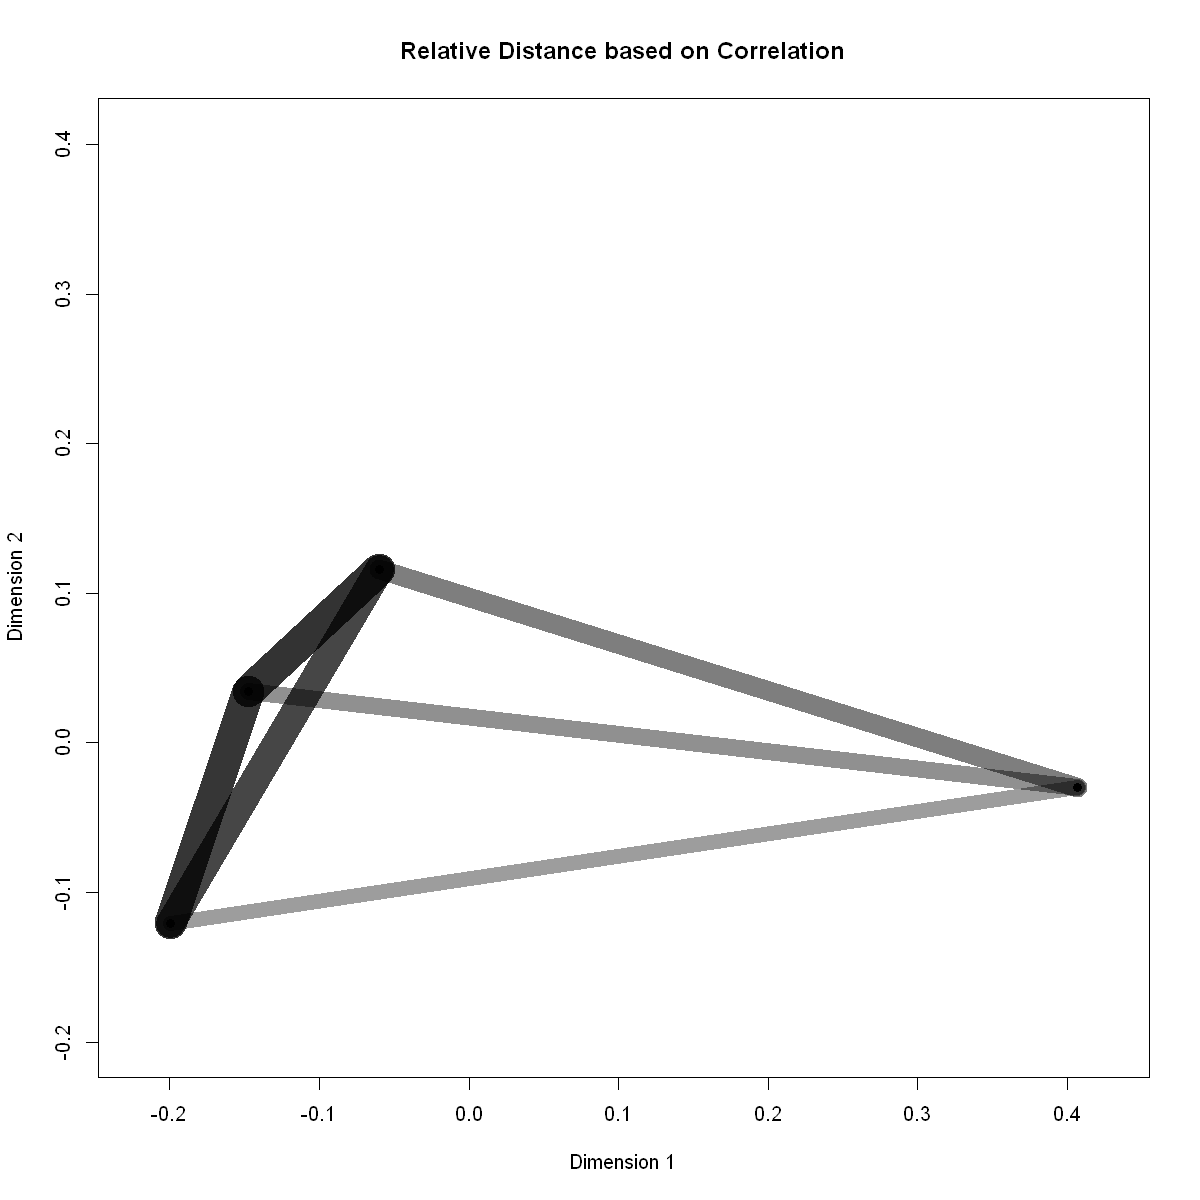

In [32]:
options(repr.plot.width=10,repr.plot.height=10)
plot(coords, pch=19, xlim=c(min(coords), max(coords)), ylim=c(min(coords), max(coords)), 
     xlab="Dimension 1", ylab="Dimension 2", main="Relative Distance based on Correlation", asp = 1)
text(coords, labels=c("", "", ""), pos=3,cex=1.5)


for(i in 1:(nrow(coords)-1)) {
  for(j in (i+1):nrow(coords)) {
    col_line <- rgb(0, 0, 0, alpha=data_combine.cor[i,j])
    lines(rbind(coords[i,], coords[j,]), lwd=33*data_combine.cor[i,j], col=col_line)
  }
}

# Plot similarity matrix

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

In [3]:
bert_sim_72r = pd.read_csv('output_data/sim_matrix/bert_72r_sim_cosine.csv',encoding='gb18030',index_col=0)
expert_sim_72r = pd.read_csv('output_data/sim_matrix/expert_72r_sim_cosine.csv',encoding='gb18030',index_col=0)
human_sim_72r = pd.read_csv('output_data/sim_matrix/human_72r_sim_cosine.csv',encoding='gb18030',index_col=0)
usa_sim_72r = pd.read_csv('output_data/sim_matrix/usa_72r_sim_cosine.csv',encoding='gb18030',index_col=0)

<AxesSubplot:>

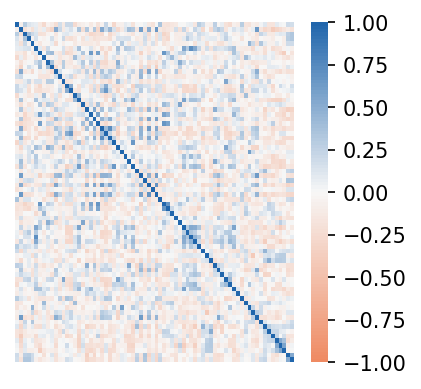

In [4]:
plt.figure(figsize=(3,3),dpi=150)
mycolor = ['#EF8A62','#F7F7F7','#2166AC']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
sns.heatmap(bert_sim_72r,xticklabels='',yticklabels='',cmap = cmaps,cbar=True,vmin=-1, vmax=1)

<AxesSubplot:>

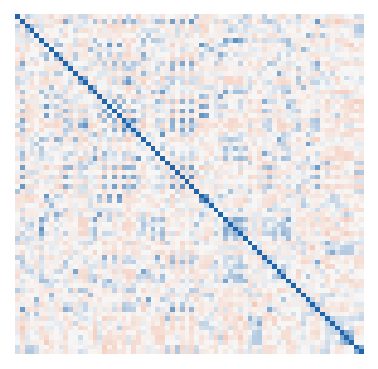

In [5]:
plt.figure(figsize=(3,3),dpi=150)
mycolor = ['#EF8A62','#F7F7F7','#2166AC']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
sns.heatmap(bert_sim_72r,xticklabels='',yticklabels='',cmap = cmaps,cbar=False,vmin=-1, vmax=1)

<AxesSubplot:>

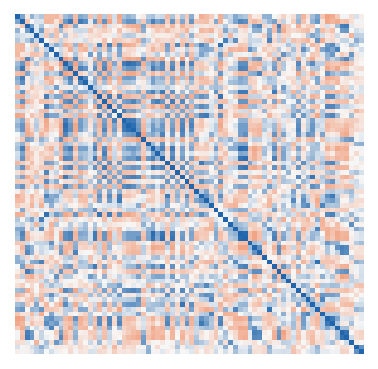

In [6]:
plt.figure(figsize=(3,3),dpi=150)
mycolor = ['#EF8A62','#F7F7F7','#2166AC']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
sns.heatmap(expert_sim_72r,xticklabels='',yticklabels='',cmap = cmaps,cbar=False,vmin=-1, vmax=1)

<AxesSubplot:>

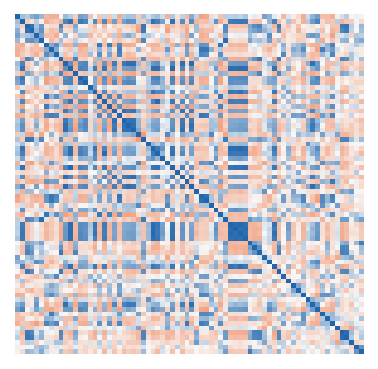

In [7]:
plt.figure(figsize=(3,3),dpi=150)
mycolor = ['#EF8A62','#F7F7F7','#2166AC']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
sns.heatmap(human_sim_72r,xticklabels='',yticklabels='',cmap = cmaps,cbar=False,vmin=-1, vmax=1)

<AxesSubplot:>

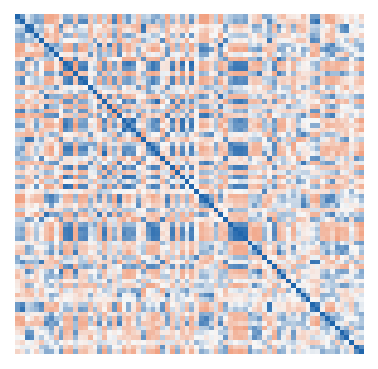

In [8]:
plt.figure(figsize=(3,3),dpi=150)
mycolor = ['#EF8A62','#F7F7F7','#2166AC']
cmaps = mpl.colors.LinearSegmentedColormap.from_list('mylist',mycolor,N=100)
sns.heatmap(usa_sim_72r,xticklabels='',yticklabels='',cmap = cmaps,cbar=False,vmin=-1, vmax=1)